In [ ]:
import keras
import numpy as np
from os import listdir
# from scipy.misc import imread, imresize
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to your data folder on Google Drive
data_dir = '/content/drive/MyDrive/Dogs/Train_Data'
test_dir = '/content/drive/MyDrive/Dogs/test'

# Define the image dimensions and batch size
img_width, img_height = 64, 64
batch_size = 1

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to the range [0, 1]
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift the width
    height_shift_range=0.2,  # Randomly shift the height
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2  # Split the data into training and validation
)

# Load images and split them into training and validation sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Change this to suit your task
    subset='training'  # This specifies the training set
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Change this to suit your task
    subset='validation'  # This specifies the validation set
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Change this to suit your task
    shuffle=False  # Disable shuffling for the test set
)



X_train = []
Y_train = []
for _ in range(len(train_generator)):
    batch_x, batch_y = train_generator.next()
    X_train.extend(batch_x)
    Y_train.extend(batch_y)

# Convert x_train and y_train to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_val = []
Y_val = []
for _ in range(len(test_generator)):
    batch_x, batch_y = test_generator.next()
    X_val.extend(batch_x)
    Y_val.extend(batch_y)

# Convert x_train and y_train to NumPy arrays
X_val = np.array(X_val)
Y_val = np.array(Y_val)

X_test = []
Y_test = []
for _ in range(len(val_generator)):
    batch_x, batch_y = val_generator.next()
    X_test.extend(batch_x)
    Y_test.extend(batch_y)

# Convert x_train and y_train to NumPy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
print(X_test.shape)
# print(X_val.shape)

Found 1120 images belonging to 2 classes.
Found 279 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
(1120, 64, 64, 3)
(279, 64, 64, 3)
(0,)


Training shape: (1120, 64, 64, 3)
1120 sample, 64 x 64 size RGB image.

Test shape: (279, 64, 64, 3)
279 sample, 64 x 64 size RGB image.

Examples:


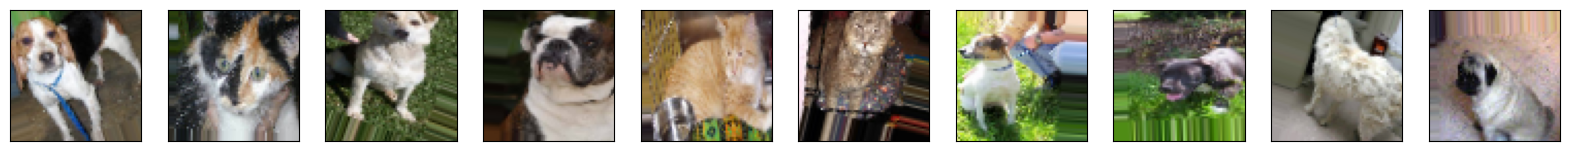

In [ ]:
img_size = X_train.shape[1] # 64
print('Training shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size RGB image.\n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size RGB image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # Display some data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
# Deep Learning Model:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.models import Model

input_img = Input(shape=(64, 64, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='mse')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928 

In [ ]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []
#checkpoints.append(TensorBoard(log_dir='/Checkpoints/logs'))

In [ ]:
epochs = 200
batch_size = 1
history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)

Epoch 1/200
1120/1120 [==============================] - 32s 27ms/step - loss: 0.0216 - val_loss: 0.0124
Epoch 2/200
1120/1120 [==============================] - 30s 27ms/step - loss: 0.0121 - val_loss: 0.0105
Epoch 3/200
1120/1120 [==============================] - 30s 27ms/step - loss: 0.0101 - val_loss: 0.0095
Epoch 4/200
1120/1120 [==============================] - 30s 27ms/step - loss: 0.0092 - val_loss: 0.0084
Epoch 5/200
1120/1120 [==============================] - 30s 27ms/step - loss: 0.0085 - val_loss: 0.0092
Epoch 6/200
1120/1120 [==============================] - 31s 28ms/step - loss: 0.0081 - val_loss: 0.0098
Epoch 7/200
1120/1120 [==============================] - 31s 27ms/step - loss: 0.0078 - val_loss: 0.0073
Epoch 8/200
1120/1120 [==============================] - 30s 27ms/step - loss: 0.0074 - val_loss: 0.0084
Epoch 9/200
1120/1120 [==============================] - 30s 27ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 10/200
1120/1120 [==============================]

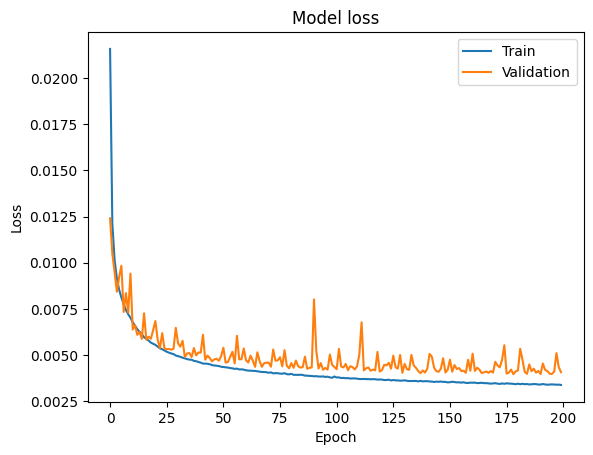

In [ ]:
import matplotlib.pyplot as plt

history = autoencoder.history
# print(history)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
decoded_imgs = autoencoder.predict(X_test)
decoded_train_imgs = autoencoder.predict(X_train)

35/35 [==============================] - 5s 153ms/step


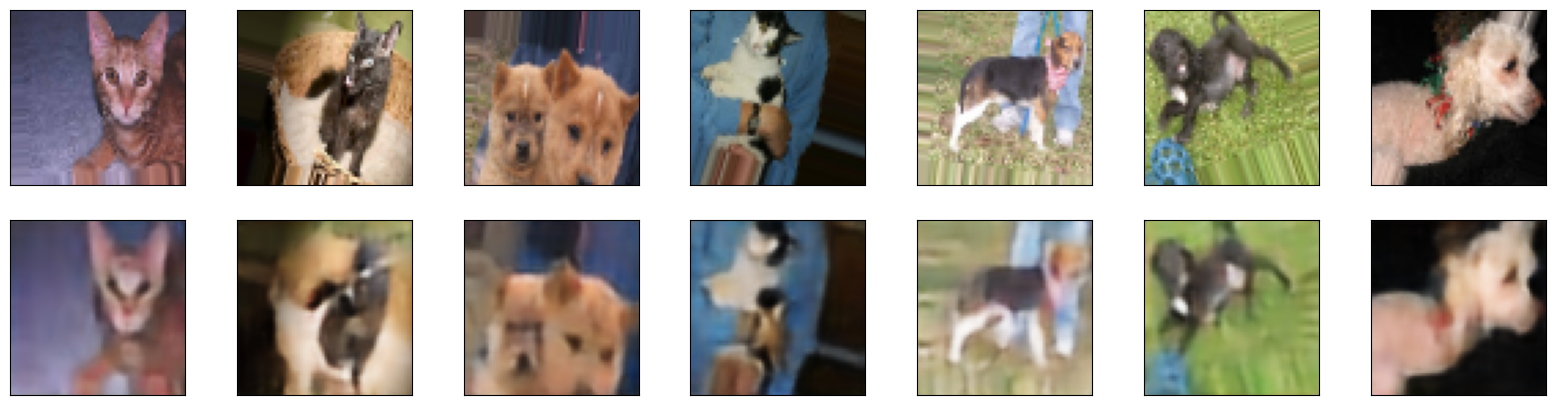

In [ ]:
n = 7
plt.figure(figsize=(20, 5))
for i in range(1, n+1):
    # Display original:
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction:
    ax = plt.subplot(2, n, i+n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

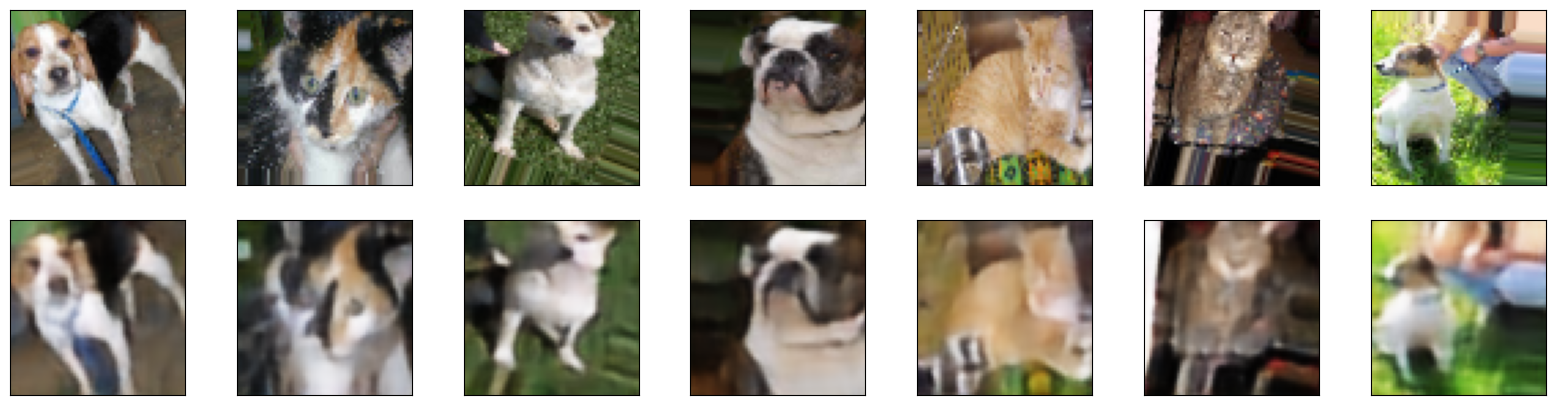

In [ ]:
n = 7
plt.figure(figsize=(20, 5))
for i in range(1, n+1):
    # Display original:
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction:
    ax = plt.subplot(2, n, i+n)
    plt.imshow(decoded_train_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)